In [182]:
#import stuff
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special

In [183]:
#we define the variables we need

w = 18*10**9
T = (2*np.pi/w)
h = 6.626070040*10**(-34)
B_0 = 10**9/h

In [184]:
#make a vector for 5/2
state = np.zeros(8)
state[0] = 1

In [185]:
#make a matrix 
a = np.zeros((8,8))
a[0][0] = 21
a[1][1] = 3
a[2][2] = -9
a[3][3] = -15
a[4][4] = -15
a[5][5] = -9
a[6][6] = 3
a[7][7] = 21

In [186]:
#define H_0 
H_0 = h**2*B_0*a

In [187]:
w1 = B_0*h

In [188]:
b = np.zeros((8,8))

b[0][1] = np.sqrt(7)
b[1][2] = 2*np.sqrt(3)
b[2][3] = np.sqrt(15)
b[3][4] = 4
b[4][5] = np.sqrt(15)
b[5][6] = 2*np.sqrt(3)
b[6][7] = np.sqrt(7) 

c = np.transpose(b)

In [189]:
im = 1j

In [190]:
I = np.zeros((8,8))
for i in range(len(I)):
    for j in range(len(I)):
        if(i==j):
            I[i][j] = 1

In [191]:
#we iterate through 100 time steps, from 0 to T. we update 'state' every time as we go through
result = []
time = []
iterations = 1000
for count in range(iterations):
    t = T*(count/iterations)
    dt = T/iterations
    time.append(t)
    H_1 = w1*h*(np.e**(-im*t*w)*b + np.e**(im*t*w)*c)
    u = I - (im/h)*(H_0 + H_1)*(dt)
    print(state)
    state = state/(np.linalg.norm(state))
    temp = np.matmul(u,state)
    result.append(temp)
    state = temp

In [192]:
y = []
for i in range(len(result)):
    y.append(np.sqrt(result[i][1].real**2+result[i][1].imag**2))

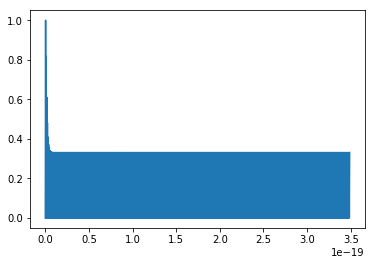

In [193]:
plt.plot(time,y)

In [27]:
H_0

array([[ 2.1e+10,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,
         0.0e+00,  0.0e+00],
       [ 0.0e+00,  3.0e+09,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,
         0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00, -9.0e+09,  0.0e+00,  0.0e+00,  0.0e+00,
         0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00, -1.5e+10,  0.0e+00,  0.0e+00,
         0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, -1.5e+10,  0.0e+00,
         0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, -9.0e+09,
         0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,
         3.0e+09,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,
         0.0e+00,  2.1e+10]])

In [121]:
T

3.490658503988659e-09

In [69]:
a = state/np.linalg.norm(state)